In [1]:
%pylab nbagg
from matplotlib import *
import sympy as sp
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Populating the interactive namespace from numpy and matplotlib


In [2]:
Re = 6370000
m = 70
H0 = 32000
HA = 8000
G = 9.8
y0 = [32000, 0]
c = 0.5
#dydt1 is for part a, dydt2 is for part 2, and dydt3 is for part 3
def dydt1(y,t):
    y1, y2 = y
    dydt1 = [y2, -G]
    return dydt1
def dydt2(y, t, c, m):
    y1, y2 = y
    dydt2 = [y2, (1/m)*(-c*y2*np.abs(y2)-m*G)]
    return dydt2
def dydt3(y, t, HA, Re, m):
    y1, y2 = y
    dydt3 = [y2, ((-0.5*np.exp(-y1/HA)*y2*np.abs(y2)-m*G/((1+(y1/Re)))**(2))/m)]
    return dydt3
t1 = linspace(0, 81, 10000)


t3 = linspace(0, 360, 10000)
t2 = linspace(0, 800, 10000)

In [7]:
sol1 = odeint(dydt1, y0, t1)
sol2 = odeint(dydt2, y0, t2, args=(c, m))
sol3 = odeint(dydt3, y0, t3, args=(HA, Re, m))

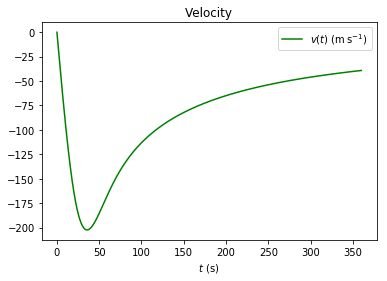

In [8]:

plot(t3, sol3[:, 1], 'g', label='$v(t)\ (\mathrm{m\,s}^{-1})$')
legend(loc='best')
xlabel('$t\ (\mathrm{s})$')

title("Velocity")
show()

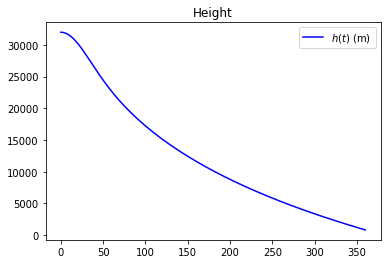

In [9]:
plot(t3, sol3[:, 0], 'b', label='$h(t)\ (\mathrm{m})$')
title("Height")
legend(loc='best')

Text(0.5,1,'Acceleration Part C')

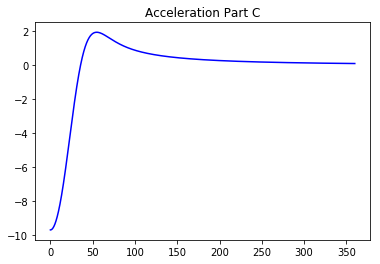

In [10]:
y3 = sol3[:, 0]
y4 = sol3[:, 1]
plot(t3, ((-0.5*np.exp(-y3/HA)*y4*np.abs(y4)-m*G/((1+(y3/Re)))**(2))/m), 'b')
title("Acceleration Part C")


The time it takes for a) 81s b)800s c)360s
The acceleration in the above graph goes to positive (upwards) because of the air resistance.  At first it's roughly -10m/s^2 which makes sense, but the parachuter would not be increasing in velocity as there is a drag force. 